In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import yfinance as yf
import datetime

import warnings
warnings.filterwarnings("ignore")

import RECH_functions_2 as RECH

import seaborn as sns
#sns.set(style="ticks")
#sns.set_style("ticks")
import pickle
#sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("ticks")

In [2]:
dow_sp_returns = pd.read_csv("log_ret_times100_all.csv")
dow_sp_returns["Date"] = dow_sp_returns["Date"].str[:10]
dow_sp_returns.index = dow_sp_returns.Date
dow_sp_returns.index = pd.to_datetime(dow_sp_returns.index)
dow_sp_returns = dow_sp_returns.drop(["Date"], axis = 1)
dow_sp_returns.drop(dow_sp_returns.tail(3).index,inplace=True)

#dow_sp_returns[dow_sp_returns.index.year > 2016]["MSFT"]

garch_fore = pd.read_csv("garch_forecasts_5march.csv")
garch_fore.index = garch_fore.Date
garch_fore = garch_fore.drop("Date", axis = 1)
garch_fore.index = pd.to_datetime(garch_fore.index)
garch_fore.drop(garch_fore.tail(3).index,inplace=True)

gjr_fore = pd.read_csv("gjr_forecasts_7march.csv")
gjr_fore.index = gjr_fore.Date
gjr_fore = gjr_fore.drop("Date", axis = 1)
gjr_fore.index = pd.to_datetime(gjr_fore.index)
gjr_fore.drop(gjr_fore.tail(3).index,inplace=True)

srn_fore = pd.read_csv("srn_forecasts_10march.csv")
srn_fore.index = srn_fore.Date
srn_fore = srn_fore.drop("Date", axis = 1)
srn_fore.index = pd.to_datetime(srn_fore.index)
srn_fore.drop(srn_fore.tail(3).index,inplace=True)

mgu_fore = pd.read_csv("mgu_forecasts_10march.csv")
mgu_fore.index = mgu_fore.Date
mgu_fore = mgu_fore.drop("Date", axis = 1)
mgu_fore.index = pd.to_datetime(mgu_fore.index)
mgu_fore.drop(mgu_fore.tail(3).index,inplace=True)

gru_fore = pd.read_csv("gru_forecasts_10march_oldbounds.csv")
gru_fore.index = gru_fore.Date
gru_fore = gru_fore.drop("Date", axis = 1)
gru_fore.index = pd.to_datetime(gru_fore.index)
gru_fore.drop(gru_fore.tail(3).index,inplace=True)

lstm_fore = pd.read_csv("lstm_forecasts_10march.csv")
lstm_fore.index = lstm_fore.Date
lstm_fore = lstm_fore.drop("Date", axis = 1)
lstm_fore.index = pd.to_datetime(lstm_fore.index)
lstm_fore.drop(lstm_fore.tail(3).index,inplace=True)




In [3]:
lstm_pars = pd.read_csv("lstm_pars_10march.csv")

lstm_pars.index = lstm_pars["Unnamed: 0"]

lstm_pars = lstm_pars.drop("Unnamed: 0", axis = 1)

#print(lstm_pars.to_latex())

garch_pars = pd.read_csv("garch_pars_5march.csv")

garch_pars.index = garch_pars["Unnamed: 0"]

garch_pars = garch_pars.drop("Unnamed: 0", axis = 1)

#print(garch_pars.to_latex())

gjr_pars = pd.read_csv("gjr_pars_7march.csv")

gjr_pars.index = gjr_pars["Unnamed: 0"]

gjr_pars = gjr_pars.drop("Unnamed: 0", axis = 1)

#print(gjr_pars.round(6).to_latex())

srn_pars = pd.read_csv("srn_pars_10march.csv")

srn_pars.index = srn_pars["Unnamed: 0"]

srn_pars = srn_pars.drop("Unnamed: 0", axis = 1)

#print(srn_pars.round(6).to_latex())

mgu_pars = pd.read_csv("mgu_pars_10march.csv")


mgu_pars.index = mgu_pars["Unnamed: 0"]

mgu_pars = mgu_pars.drop("Unnamed: 0", axis = 1)

#rint(mgu_pars.round(6).to_latex())

In [4]:
rv = pd.read_csv("rv_dow_sp.csv")
rv["Date"] = rv["Date"].str[:10]
rv.index = rv.Date
rv.index = pd.to_datetime(rv.index)
rv = rv.drop(["Date", "Unnamed: 0"], axis = 1)
rv.drop(rv.head(1).index,inplace=True)
rv.drop(rv.tail(4).index,inplace=True)
rv_comp = rv.iloc[len(rv)- len(garch_fore):]

# For timeseries figures:

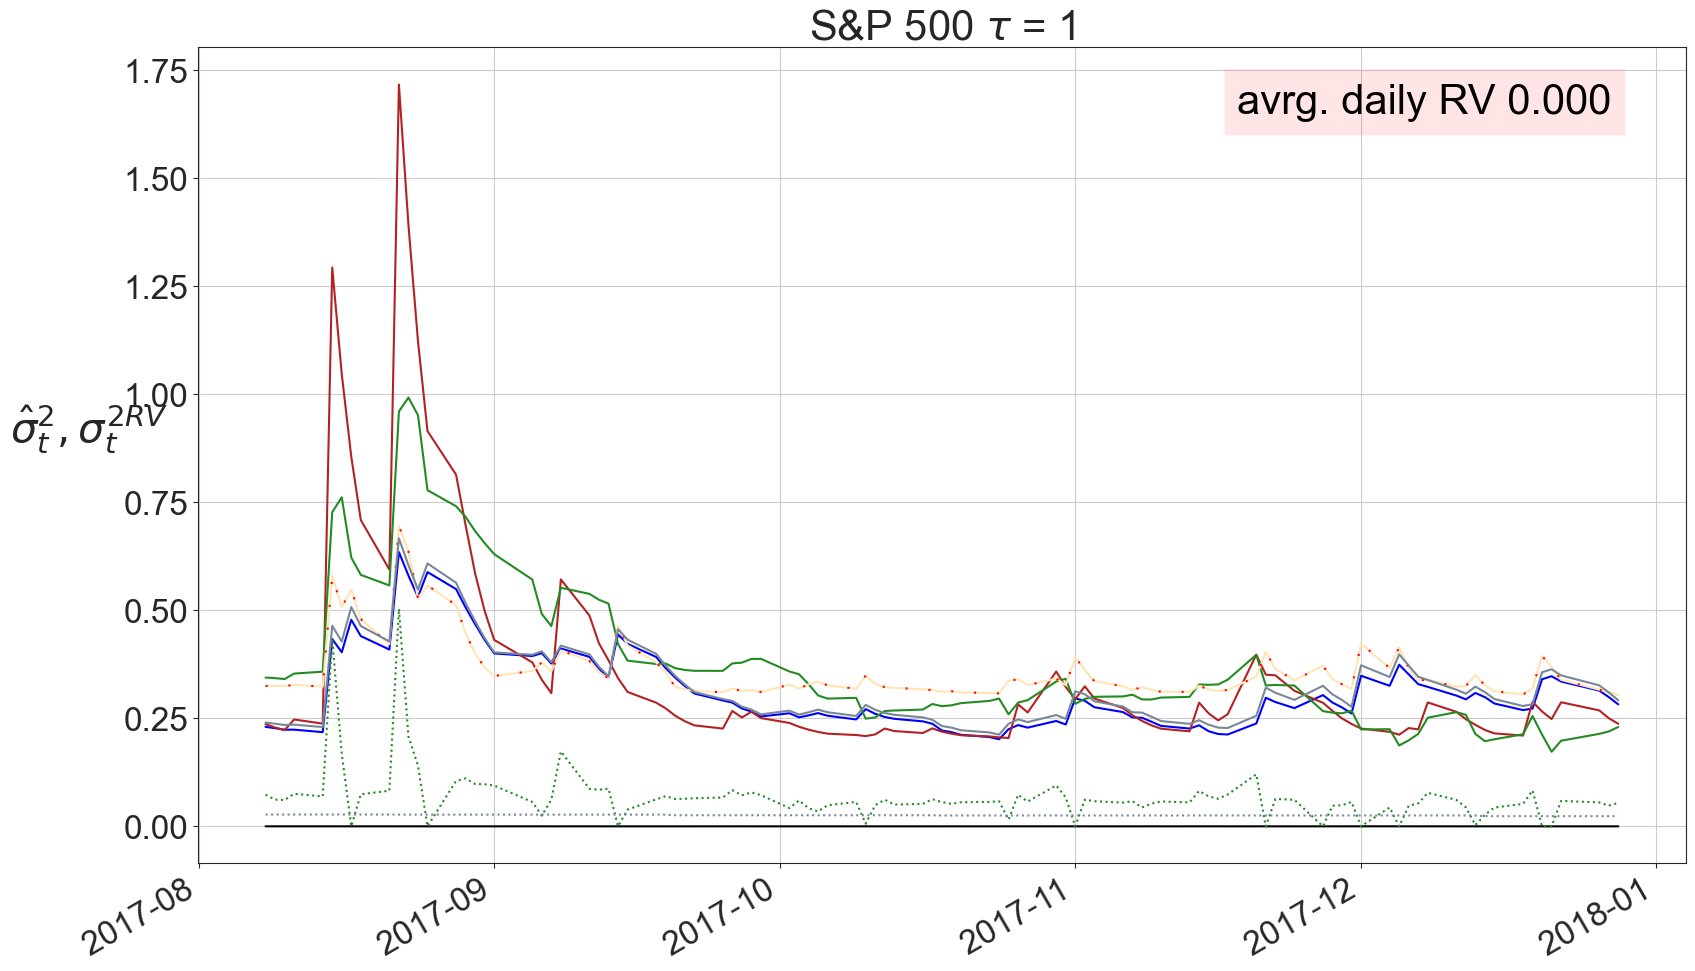

In [5]:
fontsize_b = 30
fontsize_s = 24
start = 0
end = start + 500
symb = "^GSPC"
hori = "1"

start = 150
end = start + 100
symb = "^GSPC"
hori = "1"
avg_rv = np.sum(rv_comp[rv_comp.index.year > 2016][f"{symb}"].iloc[start:end])/len(rv_comp[rv_comp.index.year > 2016][f"{symb}"].iloc[start:end])

fig, axs = plt.subplots(1, 1, figsize = (16,12))
fig.autofmt_xdate()

#axs.plot(dow_sp_returns[dow_sp_returns.index.year > 2016][f"{symb}"].iloc[start:end], label = f"logreturns", color = "black", ls = "dotted")
axs.plot(rv_comp[rv_comp.index.year > 2016][f"{symb}"].iloc[start:end], label = f"Real. Var.", color = "black")
axs.plot(garch_fore[f"{symb}_{hori}_h"].iloc[start:end], label = "GARCH", color = "blue")
axs.plot(gjr_fore[f"{symb}_{hori}_h"].iloc[start:end], label = "GJR", color = "firebrick")
axs.plot(srn_fore[f"{symb}_{hori}_h_sigma"].iloc[start:end], label = "SRN " +r"$\sigma^2$", color = "forestgreen")
axs.plot(srn_fore[f"{symb}_{hori}_h_omega"].iloc[start:end], label = "SRN " +r"$\omega$", color = "forestgreen", ls = "dotted")
axs.plot(mgu_fore[f"{symb}_{hori}_h_sigma"].iloc[start:end], label = "MGU " +r"$\sigma^2$", color = "moccasin")
axs.plot(mgu_fore[f"{symb}_{hori}_h_omega"].iloc[start:end], label = "MGU " +r"$\omega$", color = "red", ls = (0, (1, 10)))
axs.plot(lstm_fore[f"{symb}_{hori}_h_sigma"].iloc[start:end], label = "LSTM " +r"$\sigma^2$", color = "lightslategrey")
axs.plot(lstm_fore[f"{symb}_{hori}_h_omega"].iloc[start:end], label = "LSTM " +r"$\omega$", color = "lightslategrey", ls = "dotted")
axs.set_title("S&P 500 " + r"$\tau$" + f" = {hori}", fontsize = fontsize_b)
axs.set_ylabel(r"$\hat \sigma_t^2, \sigma_t^{2 RV}$  " + "    ", rotation=0, fontsize = fontsize_b)
#axs.set_ticksize(24)

axs.text(0.95, 0.91, 'avrg. daily RV ' + f"{avg_rv:.3f}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=axs.transAxes,
        color='black', fontsize = fontsize_b, bbox = {"facecolor": "red", "alpha": 0.1,"pad":10})
plt.xticks(fontsize = fontsize_s)
plt.yticks(fontsize = fontsize_s)
plt.grid()
pos = axs.get_position()
axs.set_position([pos.x0, pos.y0, pos.width * 1.2, pos.height])
#axs.legend(loc='center right', bbox_to_anchor=(1.25, -0.5), frameon = False, ncol = 6)
#plt.legend( frameon = True, ncol = 3, fontsize = 14)
#dexy = axs.legend(loc='center right', bbox_to_anchor=(0.7, 1.08), frameon = False, ncol = 3)
#plt.savefig("C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/SP11.png", bbox_inches='tight')

# Loss Computation for loss-related figures and tables:

# MAE

In [6]:
model_list2 = ["garch", "gjr", "srn", "mgu", "gru", "lstm"]

garch_error_MAE = garch_fore.copy()
gjr_error_MAE = gjr_fore.copy()
srn_error_MAE = srn_fore.copy()
srn_error_MAE.drop(list(srn_error_MAE.filter(regex = 'omega')), axis = 1, inplace = True)
srn_error_MAE.columns = garch_error_MAE.columns
mgu_error_MAE = mgu_fore.copy()
mgu_error_MAE.drop(list(mgu_error_MAE.filter(regex = 'omega')), axis = 1, inplace = True)
mgu_error_MAE.columns = garch_error_MAE.columns
gru_error_MAE = gru_fore.copy()
gru_error_MAE.drop(list(gru_error_MAE.filter(regex = 'omega')), axis = 1, inplace = True)
gru_error_MAE.columns = garch_error_MAE.columns
lstm_error_MAE = lstm_fore.copy()
lstm_error_MAE.drop(list(lstm_error_MAE.filter(regex = 'omega')), axis = 1, inplace = True)
lstm_error_MAE.columns = garch_error_MAE.columns

model_list = [garch_error_MAE, gjr_error_MAE]#, srn_error_MAE, mgu_error_MAE, gru_error_MAE, lstm_error_MAE]
for model in model_list:

    k = 0
    for i in range(len(rv.columns)):
        j = 0
        while j < 3:
            #print(f"{model.iloc[:,k].name} and {rv.iloc[:,i].name} give {RECH.ql_loss(model.iloc[:,k]/10000, rv.iloc[:,i])}")
            #listi.append( RECH.ql_loss(model.iloc[:,k]/10000, rv.iloc[:,i]) )
            #model.iloc[:,k] = (model.iloc[:,k] - rv.iloc[:,i] * 10000)**2 # MSE
            model.iloc[:,k] = abs(model.iloc[:,k] - rv.iloc[:,i]*10000) # MAE
            #model.iloc[:,k] = (model.iloc[:,k]/(rv.iloc[:,i] * 10000)) - np.log(model.iloc[:,k]/(rv.iloc[:,i] * 10000)) -1 # QL LOSS
            j = j + 1
            k = k + 1
model_list = [srn_error_MAE, mgu_error_MAE, gru_error_MAE, lstm_error_MAE]

for model in model_list:

    k = 0
    for i in range(len(rv.columns)):
        j = 0
        while j < 3:
            #print(f"{model.iloc[:,k].name} and {rv.iloc[:,i].name} give {RECH.ql_loss(model.iloc[:,k]/10000, rv.iloc[:,i])}")
            #listi.append( RECH.ql_loss(model.iloc[:,k]/10000, rv.iloc[:,i]) )
            #model.iloc[:,k] = (model.iloc[:,k] - rv.iloc[:,i]*10000)**2 # MSE
            model.iloc[:,k] = abs(model.iloc[:,k] - rv.iloc[:,i]*10000) # MAE
            #model.iloc[:,k] = abs(model.iloc[:,k] - rv.iloc[:,i]*10000)/abs(model.iloc[:,k]) # MRE
            #model.iloc[:,k] = (model.iloc[:,k]/(rv.iloc[:,i] * 10000)) - np.log(model.iloc[:,k]/(rv.iloc[:,i] * 10000)) -1 # QL LOSS
            j = j + 1
            k = k + 1

garch_error_MAE_1 = garch_error_MAE.drop(list(garch_error_MAE.filter(regex = '5')), axis = 1)
garch_error_MAE_1 = garch_error_MAE_1.drop(list(garch_error_MAE.filter(regex = '20')), axis = 1)
gjr_error_MAE_1 = gjr_error_MAE.drop(list(gjr_error_MAE.filter(regex = '5')), axis = 1)
gjr_error_MAE_1 = gjr_error_MAE_1.drop(list(gjr_error_MAE.filter(regex = '20')), axis = 1)
srn_error_MAE_1 = srn_error_MAE.drop(list(srn_error_MAE.filter(regex = '5')), axis = 1)
srn_error_MAE_1 = srn_error_MAE_1.drop(list(srn_error_MAE.filter(regex = '20')), axis = 1)
mgu_error_MAE_1 = mgu_error_MAE.drop(list(mgu_error_MAE.filter(regex = '5')), axis = 1)
mgu_error_MAE_1 = mgu_error_MAE_1.drop(list(mgu_error_MAE.filter(regex = '20')), axis = 1)

gru_error_MAE_1 = gru_error_MAE.drop(list(gru_error_MAE.filter(regex = '5')), axis = 1)
gru_error_MAE_1 = gru_error_MAE_1.drop(list(gru_error_MAE.filter(regex = '20')), axis = 1)
lstm_error_MAE_1 = lstm_error_MAE.drop(list(lstm_error_MAE.filter(regex = '5')), axis = 1)
lstm_error_MAE_1 = lstm_error_MAE_1.drop(list(lstm_error_MAE.filter(regex = '20')), axis = 1)

garch_error_MAE_5 = garch_error_MAE.drop(list(garch_error_MAE.filter(regex = '1')), axis = 1)
garch_error_MAE_5 = garch_error_MAE_5.drop(list(garch_error_MAE.filter(regex = '20')), axis = 1)
gjr_error_MAE_5 = gjr_error_MAE.drop(list(gjr_error_MAE.filter(regex = '1')), axis = 1)
gjr_error_MAE_5 = gjr_error_MAE_5.drop(list(gjr_error_MAE.filter(regex = '20')), axis = 1)
srn_error_MAE_5 = srn_error_MAE.drop(list(srn_error_MAE.filter(regex = '1')), axis = 1)
srn_error_MAE_5 = srn_error_MAE_5.drop(list(srn_error_MAE.filter(regex = '20')), axis = 1)
mgu_error_MAE_5 = mgu_error_MAE.drop(list(mgu_error_MAE.filter(regex = '1')), axis = 1)
mgu_error_MAE_5 = mgu_error_MAE_5.drop(list(mgu_error_MAE.filter(regex = '20')), axis = 1)

gru_error_MAE_5 = gru_error_MAE.drop(list(gru_error_MAE.filter(regex = '1')), axis = 1)
gru_error_MAE_5 = gru_error_MAE_5.drop(list(gru_error_MAE.filter(regex = '20')), axis = 1)
lstm_error_MAE_5 = lstm_error_MAE.drop(list(lstm_error_MAE.filter(regex = '1')), axis = 1)
lstm_error_MAE_5 = lstm_error_MAE_5.drop(list(lstm_error_MAE.filter(regex = '20')), axis = 1)

garch_error_MAE_20 = garch_error_MAE.drop(list(garch_error_MAE.filter(regex = '5')), axis = 1)
garch_error_MAE_20 = garch_error_MAE_20.drop(list(garch_error_MAE.filter(regex = '20')), axis = 1)
gjr_error_MAE_20 = gjr_error_MAE.drop(list(gjr_error_MAE.filter(regex = '5')), axis = 1)
gjr_error_MAE_20 = gjr_error_MAE_20.drop(list(gjr_error_MAE.filter(regex = '20')), axis = 1)
srn_error_MAE_20 = srn_error_MAE.drop(list(srn_error_MAE.filter(regex = '5')), axis = 1)
srn_error_MAE_20 = srn_error_MAE_20.drop(list(srn_error_MAE.filter(regex = '20')), axis = 1)
mgu_error_MAE_20 = mgu_error_MAE.drop(list(mgu_error_MAE.filter(regex = '5')), axis = 1)
mgu_error_MAE_20 = mgu_error_MAE_20.drop(list(mgu_error_MAE.filter(regex = '20')), axis = 1)

gru_error_MAE_20 = gru_error_MAE.drop(list(gru_error_MAE.filter(regex = '5')), axis = 1)
gru_error_MAE_20 = gru_error_MAE_20.drop(list(gru_error_MAE.filter(regex = '20')), axis = 1)
lstm_error_MAE_20 = lstm_error_MAE.drop(list(lstm_error_MAE.filter(regex = '5')), axis = 1)
lstm_error_MAE_20 = lstm_error_MAE_20.drop(list(lstm_error_MAE.filter(regex = '20')), axis = 1)



# MSE

In [7]:
model_list2 = ["garch", "gjr", "srn", "mgu", "gru", "lstm"]

garch_error_MSE = garch_fore.copy()
gjr_error_MSE = gjr_fore.copy()
srn_error_MSE = srn_fore.copy()
srn_error_MSE.drop(list(srn_error_MSE.filter(regex = 'omega')), axis = 1, inplace = True)
srn_error_MSE.columns = garch_error_MSE.columns
mgu_error_MSE = mgu_fore.copy()
mgu_error_MSE.drop(list(mgu_error_MSE.filter(regex = 'omega')), axis = 1, inplace = True)
mgu_error_MSE.columns = garch_error_MSE.columns
gru_error_MSE = gru_fore.copy()
gru_error_MSE.drop(list(gru_error_MSE.filter(regex = 'omega')), axis = 1, inplace = True)
gru_error_MSE.columns = garch_error_MSE.columns
lstm_error_MSE = lstm_fore.copy()
lstm_error_MSE.drop(list(lstm_error_MSE.filter(regex = 'omega')), axis = 1, inplace = True)
lstm_error_MSE.columns = garch_error_MSE.columns

model_list = [garch_error_MSE, gjr_error_MSE]#, srn_error_MSE, mgu_error_MSE, gru_error_MSE, lstm_error_MSE]
for model in model_list:

    k = 0
    for i in range(len(rv.columns)):
        j = 0
        while j < 3:
            #print(f"{model.iloc[:,k].name} and {rv.iloc[:,i].name} give {RECH.ql_loss(model.iloc[:,k]/10000, rv.iloc[:,i])}")
            #listi.append( RECH.ql_loss(model.iloc[:,k]/10000, rv.iloc[:,i]) )
            model.iloc[:,k] = (model.iloc[:,k] - rv.iloc[:,i] * 10000)**2 # MSE
            #model.iloc[:,k] = abs(model.iloc[:,k] - rv.iloc[:,i]*10000) # MAE
            #model.iloc[:,k] = (model.iloc[:,k]/(rv.iloc[:,i] * 10000)) - np.log(model.iloc[:,k]/(rv.iloc[:,i] * 10000)) -1 # QL LOSS
            j = j + 1
            k = k + 1
model_list = [srn_error_MSE, mgu_error_MSE, gru_error_MSE, lstm_error_MSE]

for model in model_list:

    k = 0
    for i in range(len(rv.columns)):
        j = 0
        while j < 3:
            #print(f"{model.iloc[:,k].name} and {rv.iloc[:,i].name} give {RECH.ql_loss(model.iloc[:,k]/10000, rv.iloc[:,i])}")
            #listi.append( RECH.ql_loss(model.iloc[:,k]/10000, rv.iloc[:,i]) )
            model.iloc[:,k] = (model.iloc[:,k] - rv.iloc[:,i]*10000)**2 # MSE
            #model.iloc[:,k] = abs(model.iloc[:,k] - rv.iloc[:,i]*10000) # MAE
            #model.iloc[:,k] = abs(model.iloc[:,k] - rv.iloc[:,i]*10000)/abs(model.iloc[:,k]) # MRE
            #model.iloc[:,k] = (model.iloc[:,k]/(rv.iloc[:,i] * 10000)) - np.log(model.iloc[:,k]/(rv.iloc[:,i] * 10000)) -1 # QL LOSS
            j = j + 1
            k = k + 1

garch_error_MSE_1 = garch_error_MSE.drop(list(garch_error_MSE.filter(regex = '5')), axis = 1)
garch_error_MSE_1 = garch_error_MSE_1.drop(list(garch_error_MSE.filter(regex = '20')), axis = 1)
gjr_error_MSE_1 = gjr_error_MSE.drop(list(gjr_error_MSE.filter(regex = '5')), axis = 1)
gjr_error_MSE_1 = gjr_error_MSE_1.drop(list(gjr_error_MSE.filter(regex = '20')), axis = 1)
srn_error_MSE_1 = srn_error_MSE.drop(list(srn_error_MSE.filter(regex = '5')), axis = 1)
srn_error_MSE_1 = srn_error_MSE_1.drop(list(srn_error_MSE.filter(regex = '20')), axis = 1)
mgu_error_MSE_1 = mgu_error_MSE.drop(list(mgu_error_MSE.filter(regex = '5')), axis = 1)
mgu_error_MSE_1 = mgu_error_MSE_1.drop(list(mgu_error_MSE.filter(regex = '20')), axis = 1)

gru_error_MSE_1 = gru_error_MSE.drop(list(gru_error_MSE.filter(regex = '5')), axis = 1)
gru_error_MSE_1 = gru_error_MSE_1.drop(list(gru_error_MSE.filter(regex = '20')), axis = 1)
lstm_error_MSE_1 = lstm_error_MSE.drop(list(lstm_error_MSE.filter(regex = '5')), axis = 1)
lstm_error_MSE_1 = lstm_error_MSE_1.drop(list(lstm_error_MSE.filter(regex = '20')), axis = 1)

garch_error_MSE_5 = garch_error_MSE.drop(list(garch_error_MSE.filter(regex = '1')), axis = 1)
garch_error_MSE_5 = garch_error_MSE_5.drop(list(garch_error_MSE.filter(regex = '20')), axis = 1)
gjr_error_MSE_5 = gjr_error_MSE.drop(list(gjr_error_MSE.filter(regex = '1')), axis = 1)
gjr_error_MSE_5 = gjr_error_MSE_5.drop(list(gjr_error_MSE.filter(regex = '20')), axis = 1)
srn_error_MSE_5 = srn_error_MSE.drop(list(srn_error_MSE.filter(regex = '1')), axis = 1)
srn_error_MSE_5 = srn_error_MSE_5.drop(list(srn_error_MSE.filter(regex = '20')), axis = 1)
mgu_error_MSE_5 = mgu_error_MSE.drop(list(mgu_error_MSE.filter(regex = '1')), axis = 1)
mgu_error_MSE_5 = mgu_error_MSE_5.drop(list(mgu_error_MSE.filter(regex = '20')), axis = 1)

gru_error_MSE_5 = gru_error_MSE.drop(list(gru_error_MSE.filter(regex = '1')), axis = 1)
gru_error_MSE_5 = gru_error_MSE_5.drop(list(gru_error_MSE.filter(regex = '20')), axis = 1)
lstm_error_MSE_5 = lstm_error_MSE.drop(list(lstm_error_MSE.filter(regex = '1')), axis = 1)
lstm_error_MSE_5 = lstm_error_MSE_5.drop(list(lstm_error_MSE.filter(regex = '20')), axis = 1)

garch_error_MSE_20 = garch_error_MSE.drop(list(garch_error_MSE.filter(regex = '5')), axis = 1)
garch_error_MSE_20 = garch_error_MSE_20.drop(list(garch_error_MSE.filter(regex = '20')), axis = 1)
gjr_error_MSE_20 = gjr_error_MSE.drop(list(gjr_error_MSE.filter(regex = '5')), axis = 1)
gjr_error_MSE_20 = gjr_error_MSE_20.drop(list(gjr_error_MSE.filter(regex = '20')), axis = 1)
srn_error_MSE_20 = srn_error_MSE.drop(list(srn_error_MSE.filter(regex = '5')), axis = 1)
srn_error_MSE_20 = srn_error_MSE_20.drop(list(srn_error_MSE.filter(regex = '20')), axis = 1)
mgu_error_MSE_20 = mgu_error_MSE.drop(list(mgu_error_MSE.filter(regex = '5')), axis = 1)
mgu_error_MSE_20 = mgu_error_MSE_20.drop(list(mgu_error_MSE.filter(regex = '20')), axis = 1)

gru_error_MSE_20 = gru_error_MSE.drop(list(gru_error_MSE.filter(regex = '5')), axis = 1)
gru_error_MSE_20 = gru_error_MSE_20.drop(list(gru_error_MSE.filter(regex = '20')), axis = 1)
lstm_error_MSE_20 = lstm_error_MSE.drop(list(lstm_error_MSE.filter(regex = '5')), axis = 1)
lstm_error_MSE_20 = lstm_error_MSE_20.drop(list(lstm_error_MSE.filter(regex = '20')), axis = 1)



# MCS computation

# Complete MAE

In [8]:
data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
mcs_dict = {}
ind = 0
for ind in range(len(garch_error_MAE_1.columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MAE_1.iloc[:,ind]
    data.iloc[:,1] = gjr_error_MAE_1.iloc[:,ind]
    data.iloc[:,2] = srn_error_MAE_1.iloc[:,ind]
    data.iloc[:,3] = mgu_error_MAE_1.iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MAE_1.iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MAE_1.iloc[:,ind]
    data.iloc[:,4] = lstm_error_MAE_1.iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon1 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['1'])


for ind in range(len(garch_error_MAE_5.columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MAE_5.iloc[:,ind]
    data.iloc[:,1] = gjr_error_MAE_5.iloc[:,ind]
    data.iloc[:,2] = srn_error_MAE_5.iloc[:,ind]
    data.iloc[:,3] = mgu_error_MAE_5.iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MAE_1.iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MAE_1.iloc[:,ind]
    data.iloc[:,4] = lstm_error_MAE_5.iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon5 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['5'])


for ind in range(len(garch_error_MAE_20.columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MAE_20.iloc[:,ind]
    data.iloc[:,1] = gjr_error_MAE_20.iloc[:,ind]
    data.iloc[:,2] = srn_error_MAE_20.iloc[:,ind]
    data.iloc[:,3] = mgu_error_MAE_20.iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MAE_1.iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MAE_1.iloc[:,ind]
    data.iloc[:,4] = lstm_error_MAE_20.iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon20 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['20'])


MAE_all = pd.concat([horizon1, horizon5, horizon20], axis = 1)
#MAE_all.head(5)

# Complete MSE

In [9]:
data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
mcs_dict = {}
ind = 0
for ind in range(len(garch_error_MSE_1.columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MSE_1.iloc[:,ind]
    data.iloc[:,1] = gjr_error_MSE_1.iloc[:,ind]
    data.iloc[:,2] = srn_error_MSE_1.iloc[:,ind]
    data.iloc[:,3] = mgu_error_MSE_1.iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MSE_1.iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MSE_1.iloc[:,ind]
    data.iloc[:,4] = lstm_error_MSE_1.iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon1 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['1'])


for ind in range(len(garch_error_MSE_5.columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MSE_5.iloc[:,ind]
    data.iloc[:,1] = gjr_error_MSE_5.iloc[:,ind]
    data.iloc[:,2] = srn_error_MSE_5.iloc[:,ind]
    data.iloc[:,3] = mgu_error_MSE_5.iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MSE_1.iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MSE_1.iloc[:,ind]
    data.iloc[:,4] = lstm_error_MSE_5.iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon5 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['5'])


for ind in range(len(garch_error_MSE_20.columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MSE_20.iloc[:,ind]
    data.iloc[:,1] = gjr_error_MSE_20.iloc[:,ind]
    data.iloc[:,2] = srn_error_MSE_20.iloc[:,ind]
    data.iloc[:,3] = mgu_error_MSE_20.iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MSE_1.iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MSE_1.iloc[:,ind]
    data.iloc[:,4] = lstm_error_MSE_20.iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon20 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['20'])


MSE_all = pd.concat([horizon1, horizon5, horizon20], axis = 1)
#MSE_all.head(5)

# MAE for low Volatility, January 2020

In [10]:
data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
mcs_dict = {}
ind = 0
for ind in range(len(garch_error_MAE_1.iloc[754:754+21].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,2] = srn_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon1 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['1'])


for ind in range(len(garch_error_MAE_5.iloc[754:754+21].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MAE_5.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MAE_5.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,2] = srn_error_MAE_5.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MAE_5.iloc[754:754+21].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MAE_5.iloc[754:754+21].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon5 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['5'])


for ind in range(len(garch_error_MAE_20.iloc[754:754+21].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MAE_20.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MAE_20.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,2] = srn_error_MAE_20.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MAE_20.iloc[754:754+21].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MAE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MAE_20.iloc[754:754+21].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon20 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['20'])


MAE_low = pd.concat([horizon1, horizon5, horizon20], axis = 1)
#MAE_all.head(5)




# MAE for high volatility, March 2020

In [11]:
data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
mcs_dict = {}
ind = 0
for ind in range(len(garch_error_MAE_1.iloc[794:794+22].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,2] = srn_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon1 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['1'])


for ind in range(len(garch_error_MAE_5.iloc[794:794+22].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MAE_5.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MAE_5.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,2] = srn_error_MAE_5.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MAE_5.iloc[794:794+22].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MAE_5.iloc[794:794+22].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon5 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['5'])


for ind in range(len(garch_error_MAE_20.iloc[794:794+22].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MAE_20.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MAE_20.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,2] = srn_error_MAE_20.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MAE_20.iloc[794:794+22].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MAE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MAE_20.iloc[794:794+22].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon20 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['20'])


MAE_high = pd.concat([horizon1, horizon5, horizon20], axis = 1)
#MAE_all.head(5)




# MSE for Low and High Volatility:

In [12]:
data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
mcs_dict = {}
ind = 0
for ind in range(len(garch_error_MSE_1.iloc[754:754+21].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,2] = srn_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon1 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['1'])


for ind in range(len(garch_error_MSE_5.iloc[754:754+21].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MSE_5.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MSE_5.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,2] = srn_error_MSE_5.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MSE_5.iloc[754:754+21].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MSE_5.iloc[754:754+21].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon5 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['5'])


for ind in range(len(garch_error_MSE_20.iloc[754:754+21].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MSE_20.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MSE_20.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,2] = srn_error_MSE_20.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MSE_20.iloc[754:754+21].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MSE_1.iloc[754:754+21].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MSE_20.iloc[754:754+21].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon20 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['20'])


MSE_low = pd.concat([horizon1, horizon5, horizon20], axis = 1)
#MSE_all.head(5)

data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
mcs_dict = {}
ind = 0
for ind in range(len(garch_error_MSE_1.iloc[794:794+22].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,2] = srn_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon1 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['1'])


for ind in range(len(garch_error_MSE_5.iloc[794:794+22].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MSE_5.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MSE_5.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,2] = srn_error_MSE_5.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MSE_5.iloc[794:794+22].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MSE_5.iloc[794:794+22].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon5 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['5'])


for ind in range(len(garch_error_MSE_20.iloc[794:794+22].columns)):
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu','gru', 'lstm'])
    data = pd.DataFrame( columns=['garch','gjr','srn','mgu', 'lstm'])
    data.iloc[:,0] = garch_error_MSE_20.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,1] = gjr_error_MSE_20.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,2] = srn_error_MSE_20.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,3] = mgu_error_MSE_20.iloc[794:794+22].iloc[:,ind]
    
    #data.iloc[:,4] = gru_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    #data.iloc[:,5] = lstm_error_MSE_1.iloc[794:794+22].iloc[:,ind]
    data.iloc[:,4] = lstm_error_MSE_20.iloc[794:794+22].iloc[:,ind]
    
    mcs = RECH.ModelConfidenceSet(data, 0.05, 3, 10000).run()
    mcs_dict[rv.columns[ind]] = mcs.included
    #mcs_dict[rv.columns[ind]] = mcs.pvalues
#data.title = rv.columns[ind]
#data.style.set_caption(rv.columns[ind])
#print(pd.DataFrame(mcs_dict).transpose())

mcs_dict = {key: " ".join(value) for key, value in mcs_dict.items()}

horizon20 = pd.DataFrame.from_dict(mcs_dict, orient='index', columns=['20'])


MSE_high = pd.concat([horizon1, horizon5, horizon20], axis = 1)
#MSE_all.head(5)





In [13]:
#MAE_all.head(5)

In [14]:
#MSE_all.head(5)

In [15]:
#MAE_low.head(5)

In [16]:
#(pd.concat([MAE_all, MSE_all], axis = 1) ==  pd.concat([MAE_low, MSE_low], axis = 1)).sum()

In [17]:
#(pd.concat([MAE_all, MSE_all], axis = 1) ==  pd.concat([MAE_high, MSE_high], axis = 1)).sum()

In [18]:
#print(pd.concat([MAE_low, MSE_low], axis = 1).to_latex())

In [19]:
#print(pd.concat([MAE_high, MSE_high], axis = 1).to_latex())

In [20]:
#print(pd.concat([MAE_all, MSE_all], axis = 1).to_latex())

In [21]:
#MAE_high.head(5)

In [22]:
#MSE_low.head(5)

In [23]:
#MSE_high.head(30)


# Relative Losses for Boxplots

In [24]:

############# LOW VOLATILITY
Mean_MAE_h1_low = pd.DataFrame([garch_error_MAE_1.iloc[754:754+21].mean(),
                            gjr_error_MAE_1.iloc[754:754+21].mean(),
                            srn_error_MAE_1.iloc[754:754+21].mean(),
                            mgu_error_MAE_1.iloc[754:754+21].mean(),
                            lstm_error_MAE_1.iloc[754:754+21].mean()]).transpose()
Mean_MAE_h1_high = pd.DataFrame([garch_error_MAE_1.iloc[794:794+22].mean(),
                            gjr_error_MAE_1.iloc[794:794+22].mean(),
                            srn_error_MAE_1.iloc[794:794+22].mean(),
                            mgu_error_MAE_1.iloc[794:794+22].mean(),
                            lstm_error_MAE_1.iloc[794:794+22].mean()]).transpose()

########################################################################################################

############# HIGH VOLATILITY
Mean_MSE_h1_low = pd.DataFrame([garch_error_MSE_1.iloc[754:754+21].mean(),
                            gjr_error_MSE_1.iloc[754:754+21].mean(),
                            srn_error_MSE_1.iloc[754:754+21].mean(),
                            mgu_error_MSE_1.iloc[754:754+21].mean(),
                            lstm_error_MSE_1.iloc[754:754+21].mean()]).transpose()
Mean_MSE_h1_high = pd.DataFrame([garch_error_MSE_1.iloc[794:794+22].mean(),
                            gjr_error_MSE_1.iloc[794:794+22].mean(),
                            srn_error_MSE_1.iloc[794:794+22].mean(),
                            mgu_error_MSE_1.iloc[794:794+22].mean(),
                            lstm_error_MSE_1.iloc[794:794+22].mean()]).transpose()

########################################################################################################
############# ALL OUT OF SAMPLE VOLATILITY
Mean_MAE_h1 = pd.DataFrame([garch_error_MAE_1.mean(),
                            gjr_error_MAE_1.mean(),
                            srn_error_MAE_1.mean(),
                            mgu_error_MAE_1.mean(),
                            lstm_error_MAE_1.mean()]).transpose()
Mean_MSE_h1 = pd.DataFrame([garch_error_MSE_1.mean(),
                            gjr_error_MSE_1.mean(),
                            srn_error_MSE_1.mean(),
                            mgu_error_MSE_1.mean(),
                            lstm_error_MSE_1.mean()]).transpose()


In [25]:
#Mean_MAE_h5_low

In [26]:

############# LOW VOLATILITY
Mean_MAE_h5_low = pd.DataFrame([garch_error_MAE_5.iloc[754:754+21].mean(),
                            gjr_error_MAE_5.iloc[754:754+21].mean(),
                            srn_error_MAE_5.iloc[754:754+21].mean(),
                            mgu_error_MAE_5.iloc[754:754+21].mean(),
                            lstm_error_MAE_5.iloc[754:754+21].mean()]).transpose()
Mean_MAE_h5_high = pd.DataFrame([garch_error_MAE_5.iloc[794:794+22].mean(),
                            gjr_error_MAE_5.iloc[794:794+22].mean(),
                            srn_error_MAE_5.iloc[794:794+22].mean(),
                            mgu_error_MAE_5.iloc[794:794+22].mean(),
                            lstm_error_MAE_5.iloc[794:794+22].mean()]).transpose()

########################################################################################################

############# HIGH VOLATILITY
Mean_MSE_h5_low = pd.DataFrame([garch_error_MSE_5.iloc[754:754+21].mean(),
                            gjr_error_MSE_5.iloc[754:754+21].mean(),
                            srn_error_MSE_5.iloc[754:754+21].mean(),
                            mgu_error_MSE_5.iloc[754:754+21].mean(),
                            lstm_error_MSE_5.iloc[754:754+21].mean()]).transpose()
Mean_MSE_h5_high = pd.DataFrame([garch_error_MSE_5.iloc[794:794+22].mean(),
                            gjr_error_MSE_5.iloc[794:794+22].mean(),
                            srn_error_MSE_5.iloc[794:794+22].mean(),
                            mgu_error_MSE_5.iloc[794:794+22].mean(),
                            lstm_error_MSE_5.iloc[794:794+22].mean()]).transpose()

########################################################################################################
############# ALL OUT OF SAMPLE VOLATILITY
Mean_MAE_h5 = pd.DataFrame([garch_error_MAE_5.mean(),
                            gjr_error_MAE_5.mean(),
                            srn_error_MAE_5.mean(),
                            mgu_error_MAE_5.mean(),
                            lstm_error_MAE_5.mean()]).transpose()
Mean_MSE_h5 = pd.DataFrame([garch_error_MSE_5.mean(),
                            gjr_error_MSE_5.mean(),
                            srn_error_MSE_5.mean(),
                            mgu_error_MSE_5.mean(),
                            lstm_error_MSE_5.mean()]).transpose()


In [27]:

############# LOW VOLATILITY
Mean_MAE_h20_low = pd.DataFrame([garch_error_MAE_20.iloc[754:754+21].mean(),
                            gjr_error_MAE_20.iloc[754:754+21].mean(),
                            srn_error_MAE_20.iloc[754:754+21].mean(),
                            mgu_error_MAE_20.iloc[754:754+21].mean(),
                            lstm_error_MAE_20.iloc[754:754+21].mean()]).transpose()
Mean_MAE_h20_high = pd.DataFrame([garch_error_MAE_20.iloc[794:794+22].mean(),
                            gjr_error_MAE_20.iloc[794:794+22].mean(),
                            srn_error_MAE_20.iloc[794:794+22].mean(),
                            mgu_error_MAE_20.iloc[794:794+22].mean(),
                            lstm_error_MAE_20.iloc[794:794+22].mean()]).transpose()

########################################################################################################

############# HIGH VOLATILITY
Mean_MSE_h20_low = pd.DataFrame([garch_error_MSE_20.iloc[754:754+21].mean(),
                            gjr_error_MSE_20.iloc[754:754+21].mean(),
                            srn_error_MSE_20.iloc[754:754+21].mean(),
                            mgu_error_MSE_20.iloc[754:754+21].mean(),
                            lstm_error_MSE_20.iloc[754:754+21].mean()]).transpose()
Mean_MSE_h20_high = pd.DataFrame([garch_error_MSE_20.iloc[794:794+22].mean(),
                            gjr_error_MSE_20.iloc[794:794+22].mean(),
                            srn_error_MSE_20.iloc[794:794+22].mean(),
                            mgu_error_MSE_20.iloc[794:794+22].mean(),
                            lstm_error_MSE_20.iloc[794:794+22].mean()]).transpose()

########################################################################################################
############# ALL OUT OF SAMPLE VOLATILITY
Mean_MAE_h20 = pd.DataFrame([garch_error_MAE_20.mean(),
                            gjr_error_MAE_20.mean(),
                            srn_error_MAE_20.mean(),
                            mgu_error_MAE_20.mean(),
                            lstm_error_MAE_20.mean()]).transpose()
Mean_MSE_h20 = pd.DataFrame([garch_error_MSE_20.mean(),
                            gjr_error_MSE_20.mean(),
                            srn_error_MSE_20.mean(),
                            mgu_error_MSE_20.mean(),
                            lstm_error_MSE_20.mean()]).transpose()


In [28]:
Mean_MAE_h1.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MAE_h1 = Mean_MAE_h1.round(2)

Mean_MSE_h1.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MSE_h1 = Mean_MSE_h1.round(2)

Mean_MAE_h1_relGARCH = Mean_MAE_h1.copy()
#Mean_MAE_h1_low_relGARCH["GARCH"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MAE_h1_relGARCH["GJR"] = Mean_MAE_h1_relGARCH["GJR"] / Mean_MAE_h1_relGARCH["GARCH"]
Mean_MAE_h1_relGARCH["SRN"] = Mean_MAE_h1_relGARCH["SRN"] / Mean_MAE_h1_relGARCH["GARCH"]
Mean_MAE_h1_relGARCH["MGU"] = Mean_MAE_h1_relGARCH["MGU"] / Mean_MAE_h1_relGARCH["GARCH"]
Mean_MAE_h1_relGARCH["LSTM"] = Mean_MAE_h1_relGARCH["LSTM"] / Mean_MAE_h1_relGARCH["GARCH"]
Mean_MAE_h1_relGARCH["GARCH"] = Mean_MAE_h1_relGARCH["GARCH"] / Mean_MAE_h1_relGARCH["GARCH"]

Mean_MSE_h1_relGARCH = Mean_MSE_h1.copy()
#Mean_MAE_h1_low_relGARCH["GARCH"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MSE_h1_relGARCH["GJR"] = Mean_MSE_h1_relGARCH["GJR"] / Mean_MSE_h1_relGARCH["GARCH"]
Mean_MSE_h1_relGARCH["SRN"] = Mean_MSE_h1_relGARCH["SRN"] / Mean_MSE_h1_relGARCH["GARCH"]
Mean_MSE_h1_relGARCH["MGU"] = Mean_MSE_h1_relGARCH["MGU"] / Mean_MSE_h1_relGARCH["GARCH"]
Mean_MSE_h1_relGARCH["LSTM"] = Mean_MSE_h1_relGARCH["LSTM"] / Mean_MSE_h1_relGARCH["GARCH"]
Mean_MSE_h1_relGARCH["GARCH"] = Mean_MSE_h1_relGARCH["GARCH"] / Mean_MSE_h1_relGARCH["GARCH"]

Mean_MAE_h5.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MAE_h5 = Mean_MAE_h5.round(2)

Mean_MSE_h5.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MSE_h5 = Mean_MSE_h5.round(2)

Mean_MAE_h5_relGARCH = Mean_MAE_h5.copy()
#Mean_MAE_h1_low_relGARCH["GARCH"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MAE_h5_relGARCH["GJR"] = Mean_MAE_h5_relGARCH["GJR"] / Mean_MAE_h5_relGARCH["GARCH"]
Mean_MAE_h5_relGARCH["SRN"] = Mean_MAE_h5_relGARCH["SRN"] / Mean_MAE_h5_relGARCH["GARCH"]
Mean_MAE_h5_relGARCH["MGU"] = Mean_MAE_h5_relGARCH["MGU"] / Mean_MAE_h5_relGARCH["GARCH"]
Mean_MAE_h5_relGARCH["LSTM"] = Mean_MAE_h5_relGARCH["LSTM"] / Mean_MAE_h5_relGARCH["GARCH"]
Mean_MAE_h5_relGARCH["GARCH"] = Mean_MAE_h5_relGARCH["GARCH"] / Mean_MAE_h5_relGARCH["GARCH"]

Mean_MSE_h5_relGARCH = Mean_MSE_h5.copy()
#Mean_MAE_h1_low_relGARCH["GARCH"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MSE_h5_relGARCH["GJR"] = Mean_MSE_h5_relGARCH["GJR"] / Mean_MSE_h5_relGARCH["GARCH"]
Mean_MSE_h5_relGARCH["SRN"] = Mean_MSE_h5_relGARCH["SRN"] / Mean_MSE_h5_relGARCH["GARCH"]
Mean_MSE_h5_relGARCH["MGU"] = Mean_MSE_h5_relGARCH["MGU"] / Mean_MSE_h5_relGARCH["GARCH"]
Mean_MSE_h5_relGARCH["LSTM"] = Mean_MSE_h5_relGARCH["LSTM"] / Mean_MSE_h5_relGARCH["GARCH"]
Mean_MSE_h5_relGARCH["GARCH"] = Mean_MSE_h5_relGARCH["GARCH"] / Mean_MSE_h5_relGARCH["GARCH"]

Mean_MAE_h20.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MAE_h20 = Mean_MAE_h20.round(2)

Mean_MSE_h20.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MSE_h20 = Mean_MSE_h20.round(2)

Mean_MAE_h20_relGARCH = Mean_MAE_h20.copy()
#Mean_MAE_h1_low_relGARCH["GARCH"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MAE_h20_relGARCH["GJR"] = Mean_MAE_h20_relGARCH["GJR"] / Mean_MAE_h20_relGARCH["GARCH"]
Mean_MAE_h20_relGARCH["SRN"] = Mean_MAE_h20_relGARCH["SRN"] / Mean_MAE_h20_relGARCH["GARCH"]
Mean_MAE_h20_relGARCH["MGU"] = Mean_MAE_h20_relGARCH["MGU"] / Mean_MAE_h20_relGARCH["GARCH"]
Mean_MAE_h20_relGARCH["LSTM"] = Mean_MAE_h20_relGARCH["LSTM"] / Mean_MAE_h20_relGARCH["GARCH"]
Mean_MAE_h20_relGARCH["GARCH"] = Mean_MAE_h20_relGARCH["GARCH"] / Mean_MAE_h20_relGARCH["GARCH"]

Mean_MSE_h20_relGARCH = Mean_MSE_h20.copy()
#Mean_MAE_h1_low_relGARCH["GARCH"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MSE_h20_relGARCH["GJR"] = Mean_MSE_h20_relGARCH["GJR"] / Mean_MSE_h20_relGARCH["GARCH"]
Mean_MSE_h20_relGARCH["SRN"] = Mean_MSE_h20_relGARCH["SRN"] / Mean_MSE_h20_relGARCH["GARCH"]
Mean_MSE_h20_relGARCH["MGU"] = Mean_MSE_h20_relGARCH["MGU"] / Mean_MSE_h20_relGARCH["GARCH"]
Mean_MSE_h20_relGARCH["LSTM"] = Mean_MSE_h20_relGARCH["LSTM"] / Mean_MSE_h20_relGARCH["GARCH"]
Mean_MSE_h20_relGARCH["GARCH"] = Mean_MSE_h20_relGARCH["GARCH"] / Mean_MSE_h20_relGARCH["GARCH"]



In [29]:
Mean_MAE_h1_low.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MAE_h1_high.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MAE_h1_low = Mean_MAE_h1_low.round(2)
Mean_MAE_h1_high = Mean_MAE_h1_high.round(2)

Mean_MSE_h1_low.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MSE_h1_high.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MSE_h1_low = Mean_MSE_h1_low.round(2)
Mean_MSE_h1_high = Mean_MSE_h1_high.round(2)

Mean_MAE_h1_low_relGARCH = Mean_MAE_h1_low.copy()
#Mean_MAE_h1_low_relGARCH["GARCH"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MAE_h1_low_relGARCH["GJR"] = Mean_MAE_h1_low_relGARCH["GJR"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MAE_h1_low_relGARCH["SRN"] = Mean_MAE_h1_low_relGARCH["SRN"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MAE_h1_low_relGARCH["MGU"] = Mean_MAE_h1_low_relGARCH["MGU"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MAE_h1_low_relGARCH["LSTM"] = Mean_MAE_h1_low_relGARCH["LSTM"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MAE_h1_low_relGARCH["GARCH"] = Mean_MAE_h1_low_relGARCH["GARCH"] / Mean_MAE_h1_low_relGARCH["GARCH"]

Mean_MAE_h1_high_relGARCH = Mean_MAE_h1_high.copy()
#Mean_MAE_h1_low_relGARCH["GARCH"] / Mean_MAE_h1_low_relGARCH["GARCH"]
Mean_MAE_h1_high_relGARCH["GJR"] = Mean_MAE_h1_high_relGARCH["GJR"] / Mean_MAE_h1_high_relGARCH["GARCH"]
Mean_MAE_h1_high_relGARCH["SRN"] = Mean_MAE_h1_high_relGARCH["SRN"] / Mean_MAE_h1_high_relGARCH["GARCH"]
Mean_MAE_h1_high_relGARCH["MGU"] = Mean_MAE_h1_high_relGARCH["MGU"] / Mean_MAE_h1_high_relGARCH["GARCH"]
Mean_MAE_h1_high_relGARCH["LSTM"] = Mean_MAE_h1_high_relGARCH["LSTM"] / Mean_MAE_h1_high_relGARCH["GARCH"]
Mean_MAE_h1_high_relGARCH["GARCH"] = Mean_MAE_h1_high_relGARCH["GARCH"] / Mean_MAE_h1_high_relGARCH["GARCH"]

Mean_MSE_h1_low_relGARCH = Mean_MSE_h1_low.copy()
#Mean_MSE_h1_low_relGARCH["GARCH"] / Mean_MSE_h1_low_relGARCH["GARCH"]
Mean_MSE_h1_low_relGARCH["GJR"] = Mean_MSE_h1_low_relGARCH["GJR"] / Mean_MSE_h1_low_relGARCH["GARCH"]
Mean_MSE_h1_low_relGARCH["SRN"] = Mean_MSE_h1_low_relGARCH["SRN"] / Mean_MSE_h1_low_relGARCH["GARCH"]
Mean_MSE_h1_low_relGARCH["MGU"] = Mean_MSE_h1_low_relGARCH["MGU"] / Mean_MSE_h1_low_relGARCH["GARCH"]
Mean_MSE_h1_low_relGARCH["LSTM"] = Mean_MSE_h1_low_relGARCH["LSTM"] / Mean_MSE_h1_low_relGARCH["GARCH"]
Mean_MSE_h1_low_relGARCH["GARCH"] = Mean_MSE_h1_low_relGARCH["GARCH"] / Mean_MSE_h1_low_relGARCH["GARCH"]

Mean_MSE_h1_high_relGARCH = Mean_MSE_h1_high.copy()
#Mean_MSE_h1_low_relGARCH["GARCH"] / Mean_MSE_h1_low_relGARCH["GARCH"]
Mean_MSE_h1_high_relGARCH["GJR"] = Mean_MSE_h1_high_relGARCH["GJR"] / Mean_MSE_h1_high_relGARCH["GARCH"]
Mean_MSE_h1_high_relGARCH["SRN"] = Mean_MSE_h1_high_relGARCH["SRN"] / Mean_MSE_h1_high_relGARCH["GARCH"]
Mean_MSE_h1_high_relGARCH["MGU"] = Mean_MSE_h1_high_relGARCH["MGU"] / Mean_MSE_h1_high_relGARCH["GARCH"]
Mean_MSE_h1_high_relGARCH["LSTM"] = Mean_MSE_h1_high_relGARCH["LSTM"] / Mean_MSE_h1_high_relGARCH["GARCH"]
Mean_MSE_h1_high_relGARCH["GARCH"] = Mean_MSE_h1_high_relGARCH["GARCH"] / Mean_MSE_h1_high_relGARCH["GARCH"]

In [30]:
Mean_MAE_h5_low.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MAE_h5_high.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MAE_h5_low = Mean_MAE_h5_low.round(2)
Mean_MAE_h5_high = Mean_MAE_h5_high.round(2)

Mean_MSE_h5_low.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MSE_h5_high.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MSE_h5_low = Mean_MSE_h5_low.round(2)
Mean_MSE_h5_high = Mean_MSE_h5_high.round(2)

Mean_MAE_h5_low_relGARCH = Mean_MAE_h5_low.copy()
#Mean_MAE_h5_low_relGARCH["GARCH"] / Mean_MAE_h5_low_relGARCH["GARCH"]
Mean_MAE_h5_low_relGARCH["GJR"] = Mean_MAE_h5_low_relGARCH["GJR"] / Mean_MAE_h5_low_relGARCH["GARCH"]
Mean_MAE_h5_low_relGARCH["SRN"] = Mean_MAE_h5_low_relGARCH["SRN"] / Mean_MAE_h5_low_relGARCH["GARCH"]
Mean_MAE_h5_low_relGARCH["MGU"] = Mean_MAE_h5_low_relGARCH["MGU"] / Mean_MAE_h5_low_relGARCH["GARCH"]
Mean_MAE_h5_low_relGARCH["LSTM"] = Mean_MAE_h5_low_relGARCH["LSTM"] / Mean_MAE_h5_low_relGARCH["GARCH"]
Mean_MAE_h5_low_relGARCH["GARCH"] = Mean_MAE_h5_low_relGARCH["GARCH"] / Mean_MAE_h5_low_relGARCH["GARCH"]

Mean_MAE_h5_high_relGARCH = Mean_MAE_h5_high.copy()
#Mean_MAE_h5_low_relGARCH["GARCH"] / Mean_MAE_h5_low_relGARCH["GARCH"]
Mean_MAE_h5_high_relGARCH["GJR"] = Mean_MAE_h5_high_relGARCH["GJR"] / Mean_MAE_h5_high_relGARCH["GARCH"]
Mean_MAE_h5_high_relGARCH["SRN"] = Mean_MAE_h5_high_relGARCH["SRN"] / Mean_MAE_h5_high_relGARCH["GARCH"]
Mean_MAE_h5_high_relGARCH["MGU"] = Mean_MAE_h5_high_relGARCH["MGU"] / Mean_MAE_h5_high_relGARCH["GARCH"]
Mean_MAE_h5_high_relGARCH["LSTM"] = Mean_MAE_h5_high_relGARCH["LSTM"] / Mean_MAE_h5_high_relGARCH["GARCH"]
Mean_MAE_h5_high_relGARCH["GARCH"] = Mean_MAE_h5_high_relGARCH["GARCH"] / Mean_MAE_h5_high_relGARCH["GARCH"]

Mean_MSE_h5_low_relGARCH = Mean_MSE_h5_low.copy()
#Mean_MSE_h5_low_relGARCH["GARCH"] / Mean_MSE_h5_low_relGARCH["GARCH"]
Mean_MSE_h5_low_relGARCH["GJR"] = Mean_MSE_h5_low_relGARCH["GJR"] / Mean_MSE_h5_low_relGARCH["GARCH"]
Mean_MSE_h5_low_relGARCH["SRN"] = Mean_MSE_h5_low_relGARCH["SRN"] / Mean_MSE_h5_low_relGARCH["GARCH"]
Mean_MSE_h5_low_relGARCH["MGU"] = Mean_MSE_h5_low_relGARCH["MGU"] / Mean_MSE_h5_low_relGARCH["GARCH"]
Mean_MSE_h5_low_relGARCH["LSTM"] = Mean_MSE_h5_low_relGARCH["LSTM"] / Mean_MSE_h5_low_relGARCH["GARCH"]
Mean_MSE_h5_low_relGARCH["GARCH"] = Mean_MSE_h5_low_relGARCH["GARCH"] / Mean_MSE_h5_low_relGARCH["GARCH"]

Mean_MSE_h5_high_relGARCH = Mean_MSE_h5_high.copy()
#Mean_MSE_h5_low_relGARCH["GARCH"] / Mean_MSE_h5_low_relGARCH["GARCH"]
Mean_MSE_h5_high_relGARCH["GJR"] = Mean_MSE_h5_high_relGARCH["GJR"] / Mean_MSE_h5_high_relGARCH["GARCH"]
Mean_MSE_h5_high_relGARCH["SRN"] = Mean_MSE_h5_high_relGARCH["SRN"] / Mean_MSE_h5_high_relGARCH["GARCH"]
Mean_MSE_h5_high_relGARCH["MGU"] = Mean_MSE_h5_high_relGARCH["MGU"] / Mean_MSE_h5_high_relGARCH["GARCH"]
Mean_MSE_h5_high_relGARCH["LSTM"] = Mean_MSE_h5_high_relGARCH["LSTM"] / Mean_MSE_h5_high_relGARCH["GARCH"]
Mean_MSE_h5_high_relGARCH["GARCH"] = Mean_MSE_h5_high_relGARCH["GARCH"] / Mean_MSE_h5_high_relGARCH["GARCH"]

In [31]:
Mean_MAE_h20_low.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MAE_h20_high.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MAE_h20_low = Mean_MAE_h20_low.round(2)
Mean_MAE_h20_high = Mean_MAE_h20_high.round(2)

Mean_MSE_h20_low.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MSE_h20_high.columns = ["GARCH", "GJR", "SRN", "MGU", "LSTM"]
Mean_MSE_h20_low = Mean_MSE_h20_low.round(2)
Mean_MSE_h20_high = Mean_MSE_h20_high.round(2)

Mean_MAE_h20_low_relGARCH = Mean_MAE_h20_low.copy()
#Mean_MAE_h20_low_relGARCH["GARCH"] / Mean_MAE_h20_low_relGARCH["GARCH"]
Mean_MAE_h20_low_relGARCH["GJR"] = Mean_MAE_h20_low_relGARCH["GJR"] / Mean_MAE_h20_low_relGARCH["GARCH"]
Mean_MAE_h20_low_relGARCH["SRN"] = Mean_MAE_h20_low_relGARCH["SRN"] / Mean_MAE_h20_low_relGARCH["GARCH"]
Mean_MAE_h20_low_relGARCH["MGU"] = Mean_MAE_h20_low_relGARCH["MGU"] / Mean_MAE_h20_low_relGARCH["GARCH"]
Mean_MAE_h20_low_relGARCH["LSTM"] = Mean_MAE_h20_low_relGARCH["LSTM"] / Mean_MAE_h20_low_relGARCH["GARCH"]
Mean_MAE_h20_low_relGARCH["GARCH"] = Mean_MAE_h20_low_relGARCH["GARCH"] / Mean_MAE_h20_low_relGARCH["GARCH"]

Mean_MAE_h20_high_relGARCH = Mean_MAE_h20_high.copy()
#Mean_MAE_h20_low_relGARCH["GARCH"] / Mean_MAE_h20_low_relGARCH["GARCH"]
Mean_MAE_h20_high_relGARCH["GJR"] = Mean_MAE_h20_high_relGARCH["GJR"] / Mean_MAE_h20_high_relGARCH["GARCH"]
Mean_MAE_h20_high_relGARCH["SRN"] = Mean_MAE_h20_high_relGARCH["SRN"] / Mean_MAE_h20_high_relGARCH["GARCH"]
Mean_MAE_h20_high_relGARCH["MGU"] = Mean_MAE_h20_high_relGARCH["MGU"] / Mean_MAE_h20_high_relGARCH["GARCH"]
Mean_MAE_h20_high_relGARCH["LSTM"] = Mean_MAE_h20_high_relGARCH["LSTM"] / Mean_MAE_h20_high_relGARCH["GARCH"]
Mean_MAE_h20_high_relGARCH["GARCH"] = Mean_MAE_h20_high_relGARCH["GARCH"] / Mean_MAE_h20_high_relGARCH["GARCH"]

Mean_MSE_h20_low_relGARCH = Mean_MSE_h20_low.copy()
#Mean_MSE_h20_low_relGARCH["GARCH"] / Mean_MSE_h20_low_relGARCH["GARCH"]
Mean_MSE_h20_low_relGARCH["GJR"] = Mean_MSE_h20_low_relGARCH["GJR"] / Mean_MSE_h20_low_relGARCH["GARCH"]
Mean_MSE_h20_low_relGARCH["SRN"] = Mean_MSE_h20_low_relGARCH["SRN"] / Mean_MSE_h20_low_relGARCH["GARCH"]
Mean_MSE_h20_low_relGARCH["MGU"] = Mean_MSE_h20_low_relGARCH["MGU"] / Mean_MSE_h20_low_relGARCH["GARCH"]
Mean_MSE_h20_low_relGARCH["LSTM"] = Mean_MSE_h20_low_relGARCH["LSTM"] / Mean_MSE_h20_low_relGARCH["GARCH"]
Mean_MSE_h20_low_relGARCH["GARCH"] = Mean_MSE_h20_low_relGARCH["GARCH"] / Mean_MSE_h20_low_relGARCH["GARCH"]

Mean_MSE_h20_high_relGARCH = Mean_MSE_h20_high.copy()
#Mean_MSE_h20_low_relGARCH["GARCH"] / Mean_MSE_h20_low_relGARCH["GARCH"]
Mean_MSE_h20_high_relGARCH["GJR"] = Mean_MSE_h20_high_relGARCH["GJR"] / Mean_MSE_h20_high_relGARCH["GARCH"]
Mean_MSE_h20_high_relGARCH["SRN"] = Mean_MSE_h20_high_relGARCH["SRN"] / Mean_MSE_h20_high_relGARCH["GARCH"]
Mean_MSE_h20_high_relGARCH["MGU"] = Mean_MSE_h20_high_relGARCH["MGU"] / Mean_MSE_h20_high_relGARCH["GARCH"]
Mean_MSE_h20_high_relGARCH["LSTM"] = Mean_MSE_h20_high_relGARCH["LSTM"] / Mean_MSE_h20_high_relGARCH["GARCH"]
Mean_MSE_h20_high_relGARCH["GARCH"] = Mean_MSE_h20_high_relGARCH["GARCH"] / Mean_MSE_h20_high_relGARCH["GARCH"]

# RELATIVE MAE AND MSE FOR THE WHOLE SAMPLE

In [32]:
my_str = this_h[:-2] + "_" + sample + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")

NameError: name 'this_h' is not defined

In [ ]:
my_str

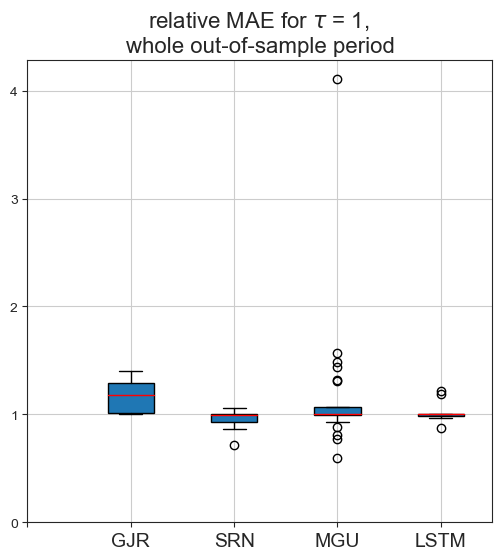

In [33]:
this_h = "1, "
sample = "whole out-of-sample period"
lossf = "MAE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MAE_h1_relGARCH["GJR"], Mean_MAE_h1_relGARCH["SRN"][Mean_MAE_h1_relGARCH["SRN"] < 100000], Mean_MAE_h1_relGARCH["MGU"][Mean_MAE_h1_relGARCH["MGU"] < 10], Mean_MAE_h1_relGARCH["LSTM"][Mean_MAE_h1_relGARCH["LSTM"] < 100000]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,5,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

In [34]:
#f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png"

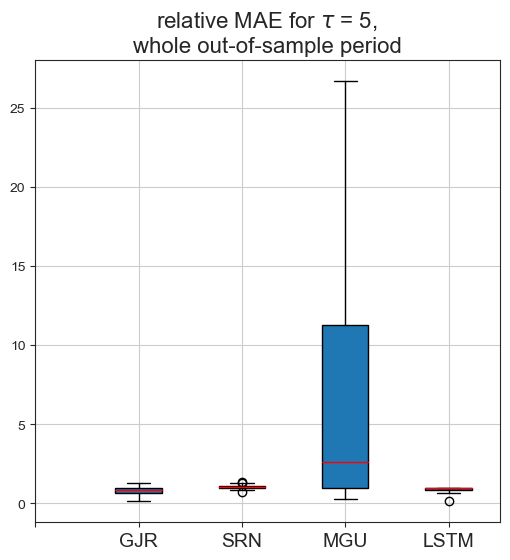

In [36]:
this_h = "5, "
sample = "whole out-of-sample period"
lossf = "MAE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MAE_h5_relGARCH["GJR"], Mean_MAE_h5_relGARCH["SRN"][Mean_MAE_h5_relGARCH["SRN"] < 100000], Mean_MAE_h5_relGARCH["MGU"][Mean_MAE_h5_relGARCH["MGU"] < 10000], Mean_MAE_h5_relGARCH["LSTM"][Mean_MAE_h5_relGARCH["LSTM"] < 100000]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,30,5)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

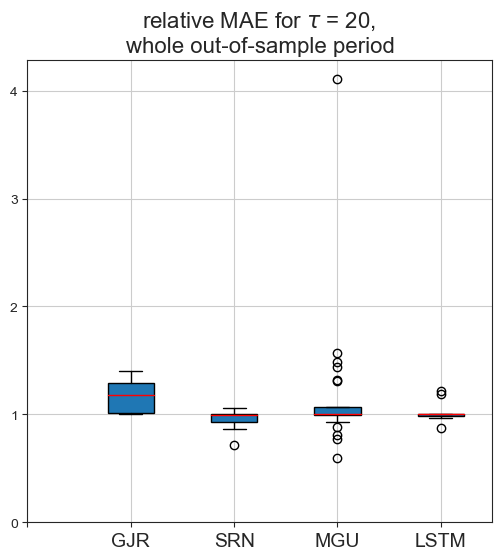

In [37]:
this_h = "20, "
sample = "whole out-of-sample period"
lossf = "MAE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MAE_h20_relGARCH["GJR"], Mean_MAE_h20_relGARCH["SRN"][Mean_MAE_h20_relGARCH["SRN"] < 100000], Mean_MAE_h20_relGARCH["MGU"][Mean_MAE_h20_relGARCH["MGU"] < 10000], Mean_MAE_h20_relGARCH["LSTM"][Mean_MAE_h20_relGARCH["LSTM"] < 100000]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,5,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

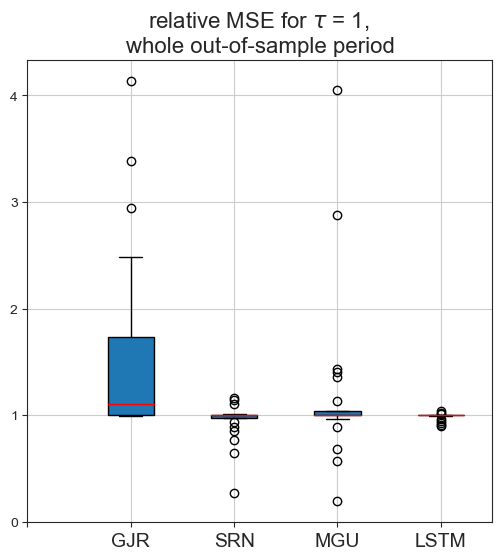

In [41]:
this_h = "1, "
sample = "whole out-of-sample period"
lossf = "MSE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h1_relGARCH["GJR"], Mean_MSE_h1_relGARCH["SRN"][Mean_MSE_h1_relGARCH["SRN"] < 50], Mean_MSE_h1_relGARCH["MGU"][Mean_MSE_h1_relGARCH["MGU"] < 10], Mean_MSE_h1_relGARCH["LSTM"][Mean_MSE_h1_relGARCH["LSTM"] < 100]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,5,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

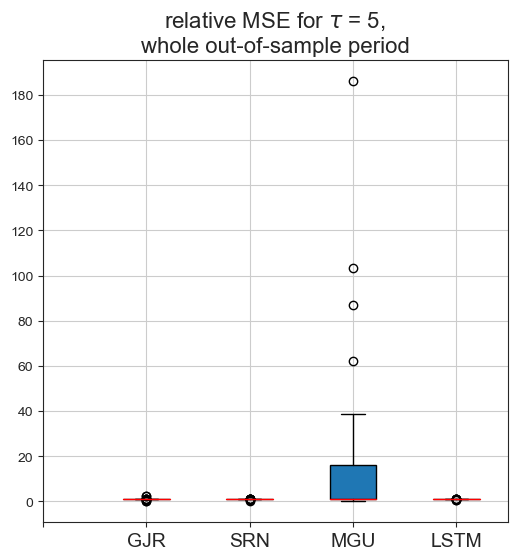

In [42]:
this_h = "5, "
sample = "whole out-of-sample period"
lossf = "MSE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h5_relGARCH["GJR"], Mean_MSE_h5_relGARCH["SRN"][Mean_MSE_h5_relGARCH["SRN"] < 100000], Mean_MSE_h5_relGARCH["MGU"][Mean_MSE_h5_relGARCH["MGU"] < 500], Mean_MSE_h5_relGARCH["LSTM"][Mean_MSE_h5_relGARCH["LSTM"] < 100000]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,200,20)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

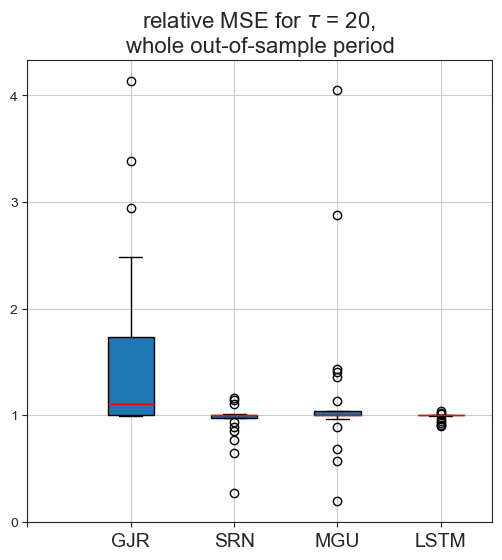

In [43]:
this_h = "20, "
sample = "whole out-of-sample period"
lossf = "MSE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h20_relGARCH["GJR"], Mean_MSE_h20_relGARCH["SRN"][Mean_MSE_h20_relGARCH["SRN"] < 100000], Mean_MSE_h20_relGARCH["MGU"][Mean_MSE_h20_relGARCH["MGU"] < 10000], Mean_MSE_h20_relGARCH["LSTM"][Mean_MSE_h20_relGARCH["LSTM"] < 100000]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,5,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

# RELATIVE MAE AND MSE FOR THE LOW VOLATILITY SAMPLE

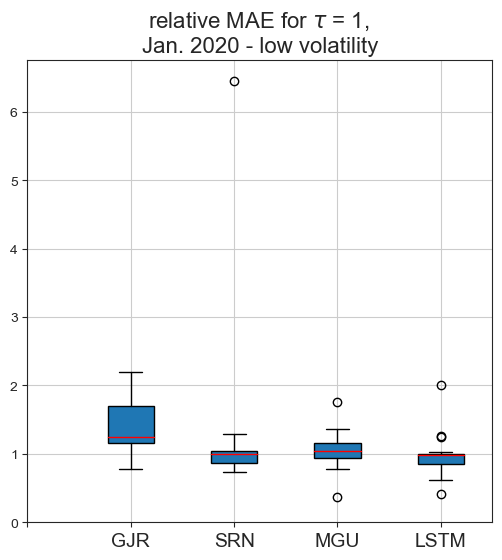

In [44]:
this_h = "1, "
sample = "Jan. 2020 - low volatility"
lossf = "MAE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MAE_h1_low_relGARCH["GJR"], Mean_MAE_h1_low_relGARCH["SRN"][Mean_MAE_h1_low_relGARCH["SRN"] < 100000], Mean_MAE_h1_low_relGARCH["MGU"][Mean_MAE_h1_low_relGARCH["MGU"] < 10], Mean_MAE_h1_low_relGARCH["LSTM"][Mean_MAE_h1_low_relGARCH["LSTM"] < 10]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,7,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

In [219]:
#f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png"

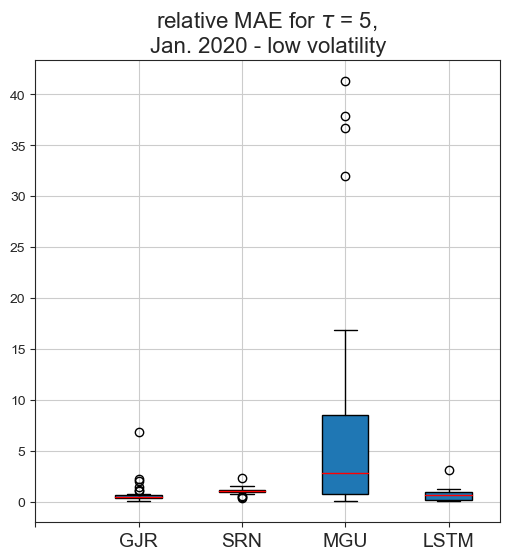

In [45]:
this_h = "5, "
sample = "Jan. 2020 - low volatility"
lossf = "MAE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MAE_h5_low_relGARCH["GJR"], Mean_MAE_h5_low_relGARCH["SRN"][Mean_MAE_h5_low_relGARCH["SRN"] < 100000], Mean_MAE_h5_low_relGARCH["MGU"][Mean_MAE_h5_low_relGARCH["MGU"] < 1000], Mean_MAE_h5_low_relGARCH["LSTM"][Mean_MAE_h5_low_relGARCH["LSTM"] < 1000]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,41,5)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

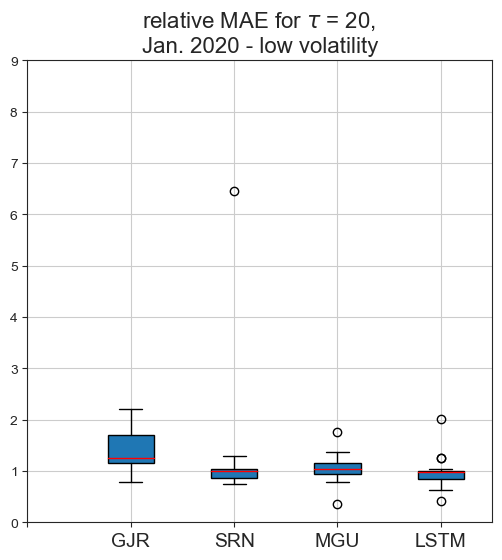

In [46]:
this_h = "20, "
sample = "Jan. 2020 - low volatility"
lossf = "MAE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MAE_h20_low_relGARCH["GJR"], Mean_MAE_h20_low_relGARCH["SRN"][Mean_MAE_h20_low_relGARCH["SRN"] < 100000], Mean_MAE_h20_low_relGARCH["MGU"][Mean_MAE_h20_low_relGARCH["MGU"] < 10], Mean_MAE_h20_low_relGARCH["LSTM"][Mean_MAE_h20_low_relGARCH["LSTM"] < 10]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,10,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

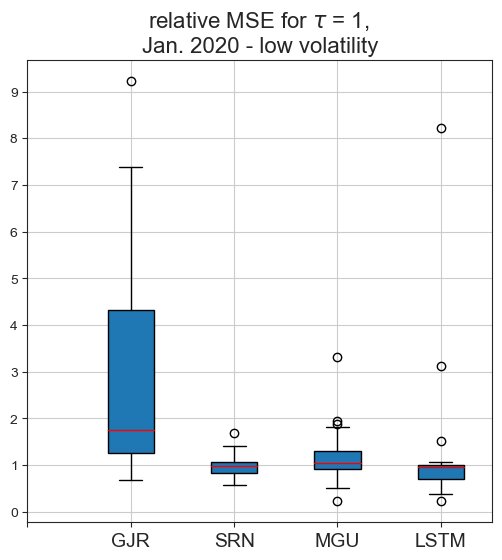

In [47]:
this_h = "1, "
sample = "Jan. 2020 - low volatility"
lossf = "MSE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h1_low_relGARCH["GJR"], Mean_MSE_h1_low_relGARCH["SRN"][Mean_MSE_h1_low_relGARCH["SRN"] < 10], Mean_MSE_h1_low_relGARCH["MGU"][Mean_MSE_h1_low_relGARCH["MGU"] < 10], Mean_MSE_h1_low_relGARCH["LSTM"][Mean_MSE_h1_low_relGARCH["LSTM"] < 10]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,10,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

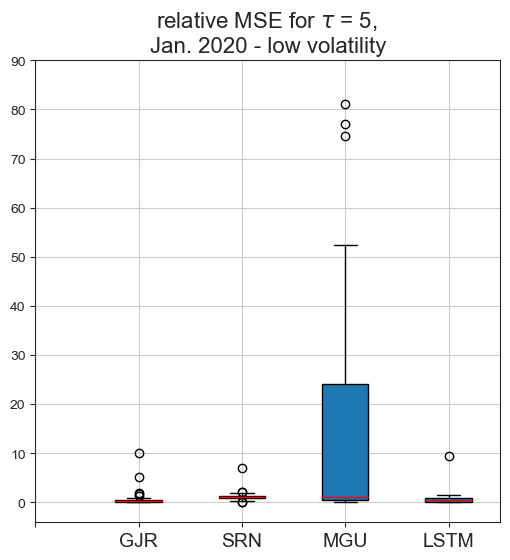

In [48]:
this_h = "5, "
sample = "Jan. 2020 - low volatility"
lossf = "MSE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h5_low_relGARCH["GJR"][Mean_MSE_h5_low_relGARCH["GJR"] < 100], Mean_MSE_h5_low_relGARCH["SRN"][Mean_MSE_h5_low_relGARCH["SRN"] < 100], Mean_MSE_h5_low_relGARCH["MGU"][Mean_MSE_h5_low_relGARCH["MGU"] < 100], Mean_MSE_h5_low_relGARCH["LSTM"][Mean_MSE_h5_low_relGARCH["LSTM"] < 1000]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,100,10)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

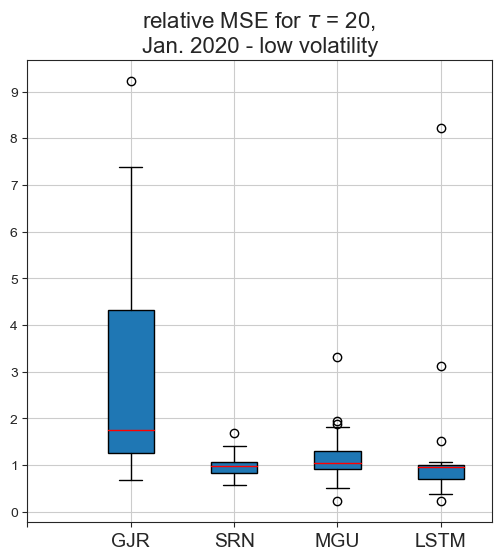

In [49]:
this_h = "20, "
sample = "Jan. 2020 - low volatility"
lossf = "MSE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h20_low_relGARCH["GJR"], Mean_MSE_h20_low_relGARCH["SRN"][Mean_MSE_h20_low_relGARCH["SRN"] < 50], Mean_MSE_h20_low_relGARCH["MGU"][Mean_MSE_h20_low_relGARCH["MGU"] < 10], Mean_MSE_h20_low_relGARCH["LSTM"][Mean_MSE_h20_low_relGARCH["LSTM"] < 10]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,10,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

# RELATIVE MAE AND MSE FOR THE LOW VOLATILITY SAMPLE

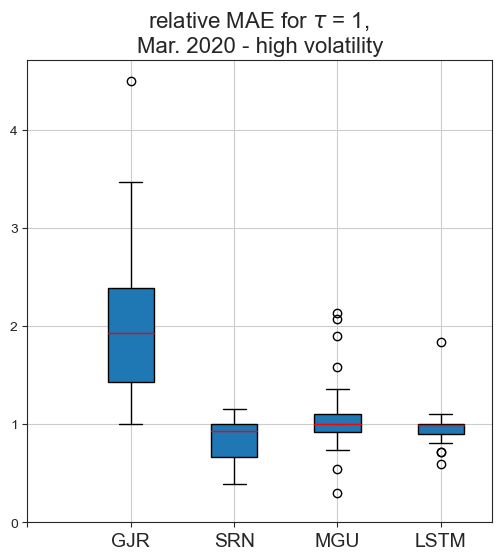

In [51]:
this_h = "1, "
sample = "Mar. 2020 - high volatility"
lossf = "MAE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MAE_h1_high_relGARCH["GJR"], Mean_MAE_h1_high_relGARCH["SRN"][Mean_MAE_h1_high_relGARCH["SRN"] < 100000], Mean_MAE_h1_high_relGARCH["MGU"][Mean_MAE_h1_high_relGARCH["MGU"] < 10], Mean_MAE_h1_high_relGARCH["LSTM"][Mean_MAE_h1_high_relGARCH["LSTM"] < 10]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,5,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

In [232]:
my_str

'1_Mar_MAE'

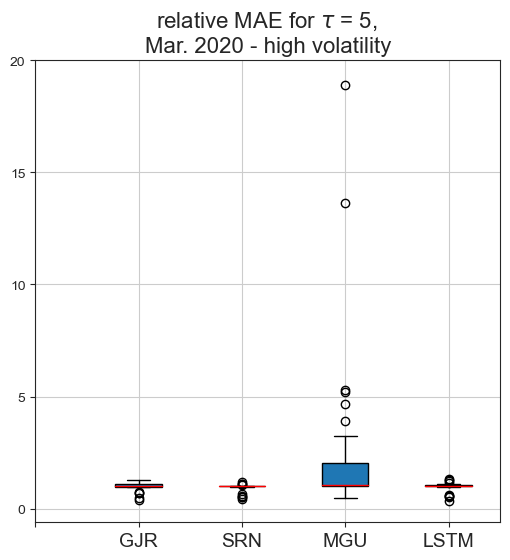

In [52]:
this_h = "5, "
sample = "Mar. 2020 - high volatility"
lossf = "MAE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MAE_h5_high_relGARCH["GJR"], Mean_MAE_h5_high_relGARCH["SRN"][Mean_MAE_h5_high_relGARCH["SRN"] < 100000], Mean_MAE_h5_high_relGARCH["MGU"][Mean_MAE_h5_high_relGARCH["MGU"] < 1000], Mean_MAE_h5_high_relGARCH["LSTM"][Mean_MAE_h5_high_relGARCH["LSTM"] < 1000]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,25,5)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

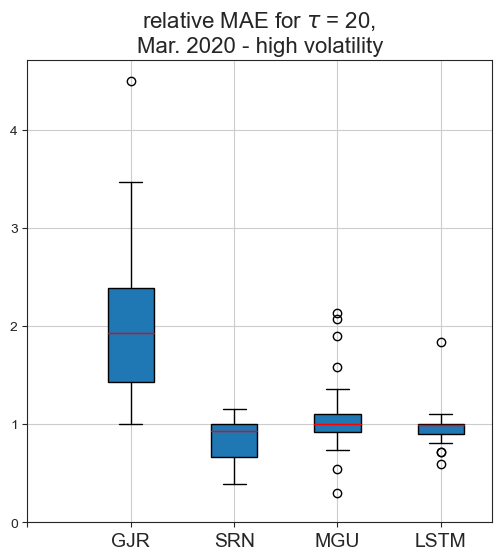

In [53]:
this_h = "20, "
sample = "Mar. 2020 - high volatility"
lossf = "MAE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MAE_h20_high_relGARCH["GJR"], Mean_MAE_h20_high_relGARCH["SRN"][Mean_MAE_h20_high_relGARCH["SRN"] < 100000], Mean_MAE_h20_high_relGARCH["MGU"][Mean_MAE_h20_high_relGARCH["MGU"] < 10], Mean_MAE_h20_high_relGARCH["LSTM"][Mean_MAE_h20_high_relGARCH["LSTM"] < 10]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,5,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

In [59]:
np.concatenate((np.arange(0,2,1), np.arange(5,25,5)))

array([ 0,  1,  5, 10, 15, 20])

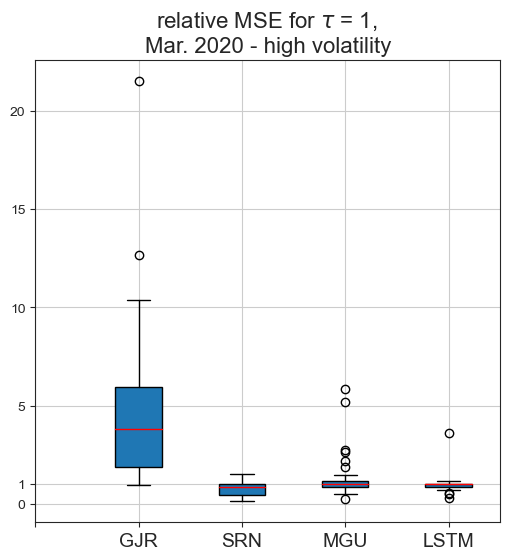

In [63]:
this_h = "1, "
sample = "Mar. 2020 - high volatility"
lossf = "MSE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h1_high_relGARCH["GJR"], Mean_MSE_h1_high_relGARCH["SRN"][Mean_MSE_h1_high_relGARCH["SRN"] < 100000], Mean_MSE_h1_high_relGARCH["MGU"][Mean_MSE_h1_high_relGARCH["MGU"] < 10], Mean_MSE_h1_high_relGARCH["LSTM"][Mean_MSE_h1_high_relGARCH["LSTM"] < 10]], patch_artist=True,
          medianprops=dict(color=c))
#y = np.arange(0,25,5)
y = np.concatenate((np.arange(0,2,1), np.arange(5,25,5)))
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

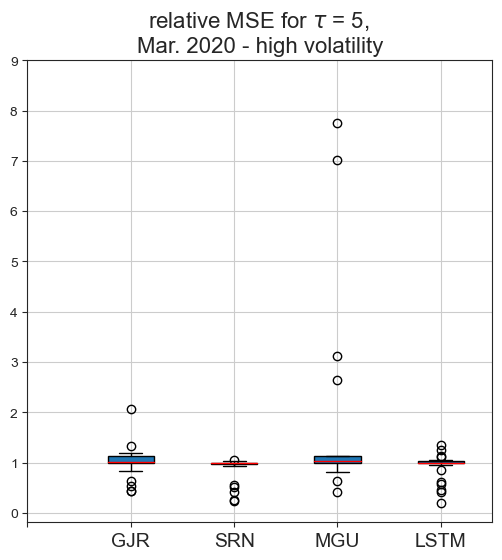

In [249]:
this_h = "5, "
sample = "Mar. 2020 - high volatility"
lossf = "MSE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h5_high_relGARCH["GJR"], Mean_MSE_h5_high_relGARCH["SRN"][Mean_MSE_h5_high_relGARCH["SRN"] < 100000], Mean_MSE_h5_high_relGARCH["MGU"][Mean_MSE_h5_high_relGARCH["MGU"] < 20], Mean_MSE_h5_high_relGARCH["LSTM"][Mean_MSE_h5_high_relGARCH["LSTM"] < 1000]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,10,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

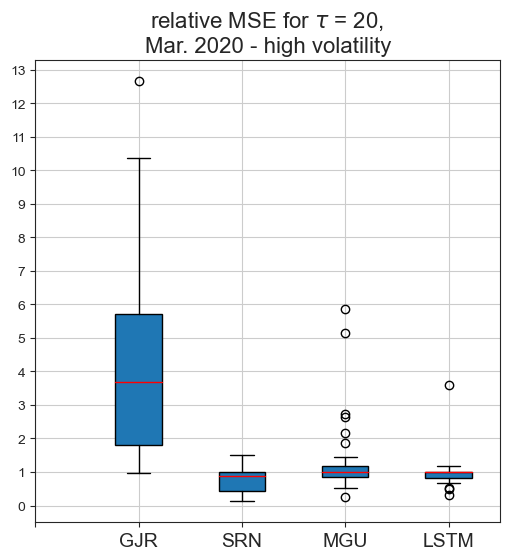

In [251]:
this_h = "20, "
sample = "Mar. 2020 - high volatility"
lossf = "MSE"
title = "relative " + lossf + r" for $\tau$ = " + this_h + "\n" + sample 

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h20_high_relGARCH["GJR"][Mean_MSE_h20_high_relGARCH["GJR"] < 15], Mean_MSE_h20_high_relGARCH["SRN"][Mean_MSE_h20_high_relGARCH["SRN"] < 100000], Mean_MSE_h20_high_relGARCH["MGU"][Mean_MSE_h20_high_relGARCH["MGU"] < 10], Mean_MSE_h20_high_relGARCH["LSTM"][Mean_MSE_h20_high_relGARCH["LSTM"] < 10]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,14,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title(title, fontsize = 16)
ax.grid()
my_str = this_h[:-2] + "_" + sample[:3] + "_" + lossf
my_str = my_str.replace(" ", "_")
my_str = my_str.replace("-", "_")
#ax.figure.savefig(f"C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/{my_str}.png", bbox_inches='tight')

In [ ]:
Mean_MSE_h20_high_relGARCH["GJR"][Mean_MSE_h20_high_relGARCH["GJR"] < 15].quantile(0.95)

In [ ]:
#ax.figure.savefig("C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/rel_MSE_loss_highVAR.png", bbox_inches='tight')

'C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/20_Mar_MSE.png'

In [59]:
##ax = Mean_MSE_h1_low_relGARCH[['gjr',"srn"]].plot(kind='box', title='boxplot')
# Display the plot
#plt.boxplot([Mean_MSE_h1_low_relGARCH["gjr"], Mean_MSE_h1_low_relGARCH["srn"], Mean_MSE_h1_low_relGARCH["mgu"][Mean_MSE_h1_low_relGARCH["mgu"] < 100], Mean_MSE_h1_low_relGARCH["lstm"][Mean_MSE_h1_low_relGARCH["lstm"] < 100]])
#plt.show()

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h1_low_relGARCH["GJR"], Mean_MSE_h1_low_relGARCH["SRN"][Mean_MSE_h1_low_relGARCH["SRN"] < 10], Mean_MSE_h1_low_relGARCH["MGU"][Mean_MSE_h1_low_relGARCH["MGU"] < 100], Mean_MSE_h1_low_relGARCH["LSTM"][Mean_MSE_h1_low_relGARCH["LSTM"] < 100]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,10,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title("MSE relative to GARCH, Jan. 2020", fontsize = 16)
ax.grid()
#ax.figure.savefig("C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/rel_MSE_loss_LOWVAR.png", bbox_inches='tight')

Error in callback <function flush_figures at 0x000001E5BD9B99D0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
##ax = Mean_MSE_h1_low_relGARCH[['gjr',"srn"]].plot(kind='box', title='boxplot')
# Display the plot
#plt.boxplot([Mean_MSE_h1_low_relGARCH["gjr"], Mean_MSE_h1_low_relGARCH["srn"], Mean_MSE_h1_low_relGARCH["mgu"][Mean_MSE_h1_low_relGARCH["mgu"] < 100], Mean_MSE_h1_low_relGARCH["lstm"][Mean_MSE_h1_low_relGARCH["lstm"] < 100]])
#plt.show()

c = "red"
x_ticks_labels = list(map(str.upper,["", "gjr", "srn", "mgu", "lstm"]))
#x_ticks_labels = ["", "gjr", "srn", "mgu", "lstm"]
x = np.arange(0,len(x_ticks_labels),1)
fig, ax = plt.subplots(1,1, figsize = (6,6)) 
ax.boxplot([Mean_MSE_h1_low_relGARCH["GJR"], Mean_MSE_h1_low_relGARCH["SRN"][Mean_MSE_h1_low_relGARCH["SRN"] < 10], Mean_MSE_h1_low_relGARCH["MGU"][Mean_MSE_h1_low_relGARCH["MGU"] < 100], Mean_MSE_h1_low_relGARCH["LSTM"][Mean_MSE_h1_low_relGARCH["LSTM"] < 100]], patch_artist=True,
          medianprops=dict(color=c))
y = np.arange(0,10,1)
# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
#ax.legend()
ax.set_title("MSE relative to GARCH, Jan. 2020", fontsize = 16)
ax.grid()
#ax.figure.savefig("C:/Users/Moritz/OneDrive - University of Copenhagen/My Thesis/Writing/graphics/rel_MSE_loss_LOWVAR.png", bbox_inches='tight')

In [ ]:
garch_error_MAE.head(3)

In [ ]:
#srn_fore.head(3)